In [1]:
import numpy as np
import seaborn as sbs
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

# accident

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unknown')

In [7]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [9]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [11]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions                 object
Vehicle_Type                     category
dtype: object

<h1>1. Which area is more likely to have an accident, urban or rural?</h1>

In [12]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [13]:
count = accident['Urban_or_Rural_Area'].value_counts()
total = count.sum()
percent = (count / total) * 100
percent

Urban_or_Rural_Area
Urban          63.824944
Rural          36.173391
Unallocated     0.001665
Name: count, dtype: float64

In [14]:
accident['Urban_or_Rural_Area'].value_counts().idxmax()

'Urban'

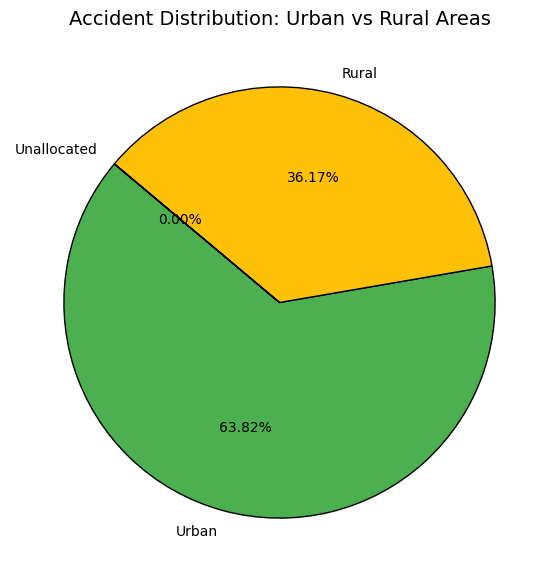

In [15]:
area_counts = accident['Urban_or_Rural_Area'].value_counts()
percentages = (area_counts / area_counts.sum()) * 100
plt.figure(figsize=(7, 7))
plt.pie(area_counts, 
        labels=area_counts.index, 
        autopct='%.2f%%', 
        colors=['#4CAF50', '#FFC107'], 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Accident Distribution: Urban vs Rural Areas', fontsize=14)
plt.show()

<h2>Insight 1: the data show that Urban is more likely to have an accident with 64% of the total accident being record.</h2>


<h1></h1>

<h1>2.Our data shows that Urban is more likely to have an accident, but what about casualties, which Area has more casualty?</h1>

In [16]:
accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()

Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287807
Name: Number_of_Casualties, dtype: float64

In [17]:
avg = accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
percent

Urban_or_Rural_Area
Rural          37.459306
Unallocated    29.928315
Urban          32.612379
Name: Number_of_Casualties, dtype: float64

In [18]:
accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean().idxmax()

'Rural'

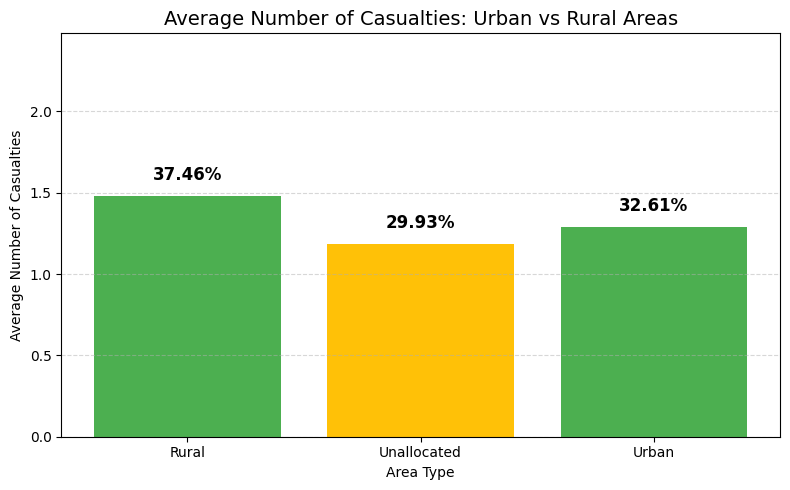

In [19]:
avg = accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
plt.figure(figsize=(8, 5))
bars = plt.bar(avg.index, avg.values, color=['#4CAF50', '#FFC107'])
for bar, pct in zip(bars, percent):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.1, 
             f"{pct:.2f}%", 
             ha='center', fontsize=12, fontweight='bold')
plt.title('Average Number of Casualties: Urban vs Rural Areas', fontsize=14)
plt.xlabel('Area Type')
plt.ylabel('Average Number of Casualties')
plt.ylim(0, max(avg.values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h3>Insight 2: Now as we can See even though Urban is more likely to have an accident, the data shows that Rural have more casualties with 37% of the total casualties being record.</h3>

<h1></h1>

<h1>3. now let see about the other concept, let look at the Severity, which Severity is more likely to have casualties</h1>

In [20]:
accident.groupby(['Accident_Severity','Urban_or_Rural_Area'])['Number_of_Casualties'].mean().idxmax()

('Fatal', 'Rural')

In [21]:
avg = accident.groupby(['Accident_Severity','Urban_or_Rural_Area'])['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
percent

Accident_Severity  Urban_or_Rural_Area
Fatal              Rural                  18.145282
                   Unallocated                  NaN
                   Urban                  13.445978
Serious            Rural                  14.572156
                   Unallocated             8.662041
                   Urban                  11.344510
Slight             Rural                  12.325838
                   Unallocated            10.394449
                   Urban                  11.109746
Name: Number_of_Casualties, dtype: float64

<Figure size 800x500 with 0 Axes>

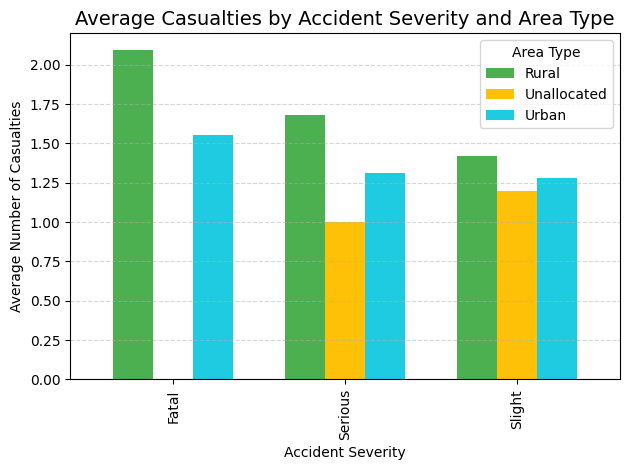

In [22]:
avg = accident.groupby(['Accident_Severity', 'Urban_or_Rural_Area'])['Number_of_Casualties'].mean()
avg_df = avg.reset_index().pivot(index='Accident_Severity', columns='Urban_or_Rural_Area', values='Number_of_Casualties')
plt.figure(figsize=(8, 5))
avg_df.plot(kind='bar', color=['#4CAF50', '#FFC107', "#1ecbe1"], width=0.7)
plt.title('Average Casualties by Accident Severity and Area Type', fontsize=14)
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Casualties')
plt.legend(title='Area Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3>Insight 3:now this data shows that, Fatal Accident in Rural Area have more Casualties involve through out the whole record, with 18% of the total record was a fatal accident in Rural Area. Which is obvious since Fatal accident tends to have more casualties than the other other accident severities, what am I even thinking of making this? </h3>

<h1></h1>

<h1>4. Now we saw all of that Fatal Accident in Rural Area have more Casualties, lets look at the other factor</h1>
<h2>How about which Vehicle? Which Vehicle in Urban And Rural Area are most likely to have accident and Casualties involve?</h2>

In [23]:
urban = accident[accident['Urban_or_Rural_Area']=='Urban']
rural = accident[accident['Urban_or_Rural_Area']=='Rural']

In [24]:
rural.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].mean().idxmax()

('Minibus (8 - 16 passenger seats)', 'Fatal')

In [25]:
urban.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].mean().idxmax()

('Goods over 3.5t. and under 7.5t', 'Fatal')

In [26]:
avg = rural.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
percent.nlargest(1)

Vehicle_Type                      Accident_Severity
Minibus (8 - 16 passenger seats)  Fatal                4.514994
Name: Number_of_Casualties, dtype: float64

In [27]:
avg = urban.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
percent.nlargest(1)

Vehicle_Type                     Accident_Severity
Goods over 3.5t. and under 7.5t  Fatal                3.379246
Name: Number_of_Casualties, dtype: float64

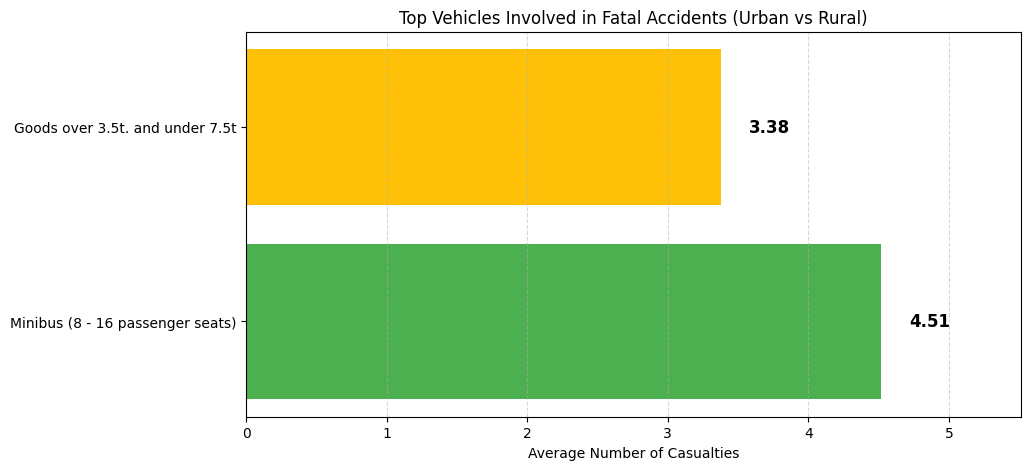

In [28]:

categories = ['Minibus (8 - 16 passenger seats)', 'Goods over 3.5t. and under 7.5t']
values = [4.514994, 3.379246] 
colors = ['#4CAF50', '#FFC107']  

plt.figure(figsize=(10, 5))
plt.barh(categories, values, color=colors)

for index, value in enumerate(values):
    plt.text(value + 0.2, index, f"{value:.2f}", va='center', fontsize=12, fontweight='bold')

plt.xlabel('Average Number of Casualties')
plt.title('Top Vehicles Involved in Fatal Accidents (Urban vs Rural)')
plt.xlim(0, max(values) + 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


<h3>Insight 4: Now as we can See the Minibus has the highest rate of casualties being record as 4.5% of the total casualties in Rural Area is involved an Fatal Accident.</h3>
<h3>And in Urban Area we can also See that Vehicle that is Goods over 3.5t. and under 7.5t has the highest rate of casualties being record as 3.4% of the total casualties in Urban area is involved in a fatal accident.</h3>

<h4>There for conclude that Minibus (8 - 16 passenger seats) and Vehicle that is Goods over 3.5t. and under 7.5t is more likely to have an accident.</h4>

<h1></h1>

<h1>5.Now How about the total on all of the accident record, which Vehicle has more Casualties involve in urban and rural?</h1>

In [29]:
urban.groupby('Vehicle_Type')['Number_of_Casualties'].mean().nlargest(3)

Vehicle_Type
Data missing or out of range    1.500000
Motorcycle over 500cc           1.296467
Taxi/Private hire car           1.296391
Name: Number_of_Casualties, dtype: float64

In [30]:
rural.groupby('Vehicle_Type')['Number_of_Casualties'].mean().nlargest(3)

Vehicle_Type
Ridden horse             2.000000
Pedal cycle              1.514286
Taxi/Private hire car    1.501817
Name: Number_of_Casualties, dtype: float64

In [31]:
avg = urban.groupby('Vehicle_Type')['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
percent

Vehicle_Type
Agricultural vehicle                     6.286426
Bus or coach (17 or more pass seats)     6.242696
Car                                      6.282796
Data missing or out of range             7.313720
Goods 7.5 tonnes mgw and over            6.306507
Goods over 3.5t. and under 7.5t          6.257546
Minibus (8 - 16 passenger seats)         6.309876
Motorcycle 125cc and under               6.171621
Motorcycle 50cc and under                6.201142
Motorcycle over 125cc and up to 500cc    6.262612
Motorcycle over 500cc                    6.321332
Other vehicle                            6.287832
Pedal cycle                              6.296326
Ridden horse                             4.875814
Taxi/Private hire car                    6.320960
Van / Goods 3.5 tonnes mgw or under      6.262793
Name: Number_of_Casualties, dtype: float64

In [32]:
avg = urban.groupby('Vehicle_Type')['Number_of_Casualties'].mean()
total = avg.sum()
percent = (avg / total) * 100
percent

Vehicle_Type
Agricultural vehicle                     6.286426
Bus or coach (17 or more pass seats)     6.242696
Car                                      6.282796
Data missing or out of range             7.313720
Goods 7.5 tonnes mgw and over            6.306507
Goods over 3.5t. and under 7.5t          6.257546
Minibus (8 - 16 passenger seats)         6.309876
Motorcycle 125cc and under               6.171621
Motorcycle 50cc and under                6.201142
Motorcycle over 125cc and up to 500cc    6.262612
Motorcycle over 500cc                    6.321332
Other vehicle                            6.287832
Pedal cycle                              6.296326
Ridden horse                             4.875814
Taxi/Private hire car                    6.320960
Van / Goods 3.5 tonnes mgw or under      6.262793
Name: Number_of_Casualties, dtype: float64

In [33]:
urban_avg = urban.groupby('Vehicle_Type')['Number_of_Casualties'].mean()
rural_avg = rural.groupby('Vehicle_Type')['Number_of_Casualties'].mean()

urban_total = urban_avg.sum()
rural_total = rural_avg.sum()

urban_percent = (urban_avg / urban_total) * 100
rural_percent = (rural_avg / rural_total) * 100
urban_table = pd.DataFrame({'Urban Percentage': urban_percent}).sort_values(by='Urban Percentage', ascending=False)
rural_table = pd.DataFrame({'Rural Percentage': rural_percent}).sort_values(by='Rural Percentage', ascending=False)
display(urban_table)
display(rural_table)


,Urban Percentage
Vehicle_Type,
Data missing or out of range,7.313720
Motorcycle over 500cc,6.321332
Taxi/Private hire car,6.320960
Minibus (8 - 16 passenger seats),6.309876
Goods 7.5 tonnes mgw and over,6.306507
Pedal cycle,6.296326
Other vehicle,6.287832
Agricultural vehicle,6.286426
Car,6.282796


,Rural Percentage
Vehicle_Type,
Ridden horse,8.857738
Pedal cycle,6.706573
Taxi/Private hire car,6.651353
Goods over 3.5t. and under 7.5t,6.645288
Van / Goods 3.5 tonnes mgw or under,6.560964
Car,6.558900
Bus or coach (17 or more pass seats),6.545402
Motorcycle over 500cc,6.540704
Motorcycle 125cc and under,6.506197


<h3>Insight 5: Based on our data, it is shown that in Urban Area, Motorcycle over 500cc and Taxi/Private hire car have more Casualties Total being record</h3>
<h3>And in Rural Area Pedal cycle and Taxi/Private hire car have more Casualties Total being record </h3>

<h1></h1>

<h1>6. Since we are Talking about Vehicle, how about looking at which Vehicle cause more, fatal accident, Serious accident and Slight accident</h1>

In [34]:
Fatal = accident[accident['Accident_Severity']=='Fatal']
Serious = accident[accident['Accident_Severity']=='Serious']
Slight = accident[accident['Accident_Severity']=='Slight']

In [35]:
Fatal['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

In [36]:
Serious['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     66461
Van / Goods 3.5 tonnes mgw or under      4554
Motorcycle over 500cc                    3457
Bus or coach (17 or more pass seats)     3373
Goods 7.5 tonnes mgw and over            2321
Name: count, dtype: int64

In [37]:
Slight['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     424954
Van / Goods 3.5 tonnes mgw or under      29139
Bus or coach (17 or more pass seats)     22180
Motorcycle over 500cc                    21861
Goods 7.5 tonnes mgw and over            14770
Name: count, dtype: int64

<h3>Insight 6: Car have serious Issue, it is shown that In all Accident Severity, Car is more likely to have an accident, as well as Van / Goods 3.5 tonnes mgw or under </h3>

In [38]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [39]:
accident['Accident_Severity'].value_counts().idxmax()

'Slight'

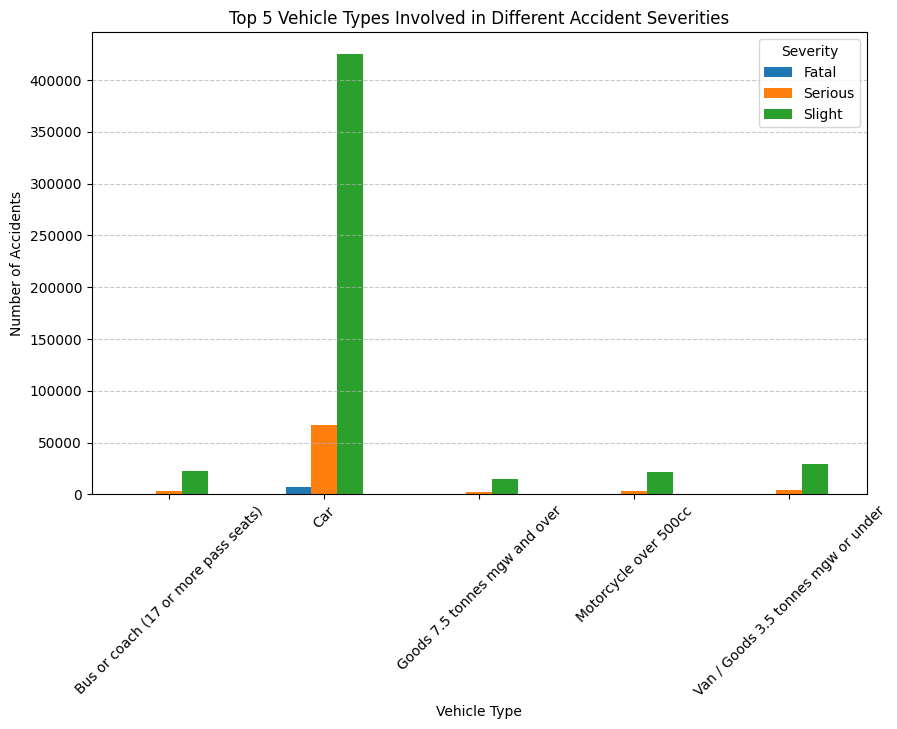

In [40]:
fatal_counts = Fatal['Vehicle_Type'].value_counts().nlargest(5)
serious_counts = Serious['Vehicle_Type'].value_counts().nlargest(5)
slight_counts = Slight['Vehicle_Type'].value_counts().nlargest(5)
severity_table = pd.DataFrame({
    'Fatal': fatal_counts,
    'Serious': serious_counts,
    'Slight': slight_counts
})
severity_table.plot(kind='bar', figsize=(10,6))
plt.title('Top 5 Vehicle Types Involved in Different Accident Severities')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>Insight 6: The most common accident severity to cause is Slight Accident</h2>

<h1></h1>

<h1>7. Let stop on Vehicle for now, lets talk about Road Type now, Which Road Type as well as their conditions cause more fatal, serious, and slight accident? </h1>

In [41]:
Fatal.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(5)

Road_Type           Road_Surface_Conditions
Single carriageway  Dry                        4338
                    Wet or damp                1993
Dual carriageway    Dry                        1217
                    Wet or damp                 551
Single carriageway  Frost or ice                153
dtype: int64

In [42]:
Serious.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(5)

Road_Type           Road_Surface_Conditions
Single carriageway  Dry                        48926
                    Wet or damp                18952
Dual carriageway    Dry                         8104
                    Wet or damp                 3233
Roundabout          Dry                         2640
dtype: int64

In [43]:
Slight.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(5)

Road_Type           Road_Surface_Conditions
Single carriageway  Dry                        279961
                    Wet or damp                117798
Dual carriageway    Dry                         56951
Roundabout          Dry                         28034
Dual carriageway    Wet or damp                 25749
dtype: int64

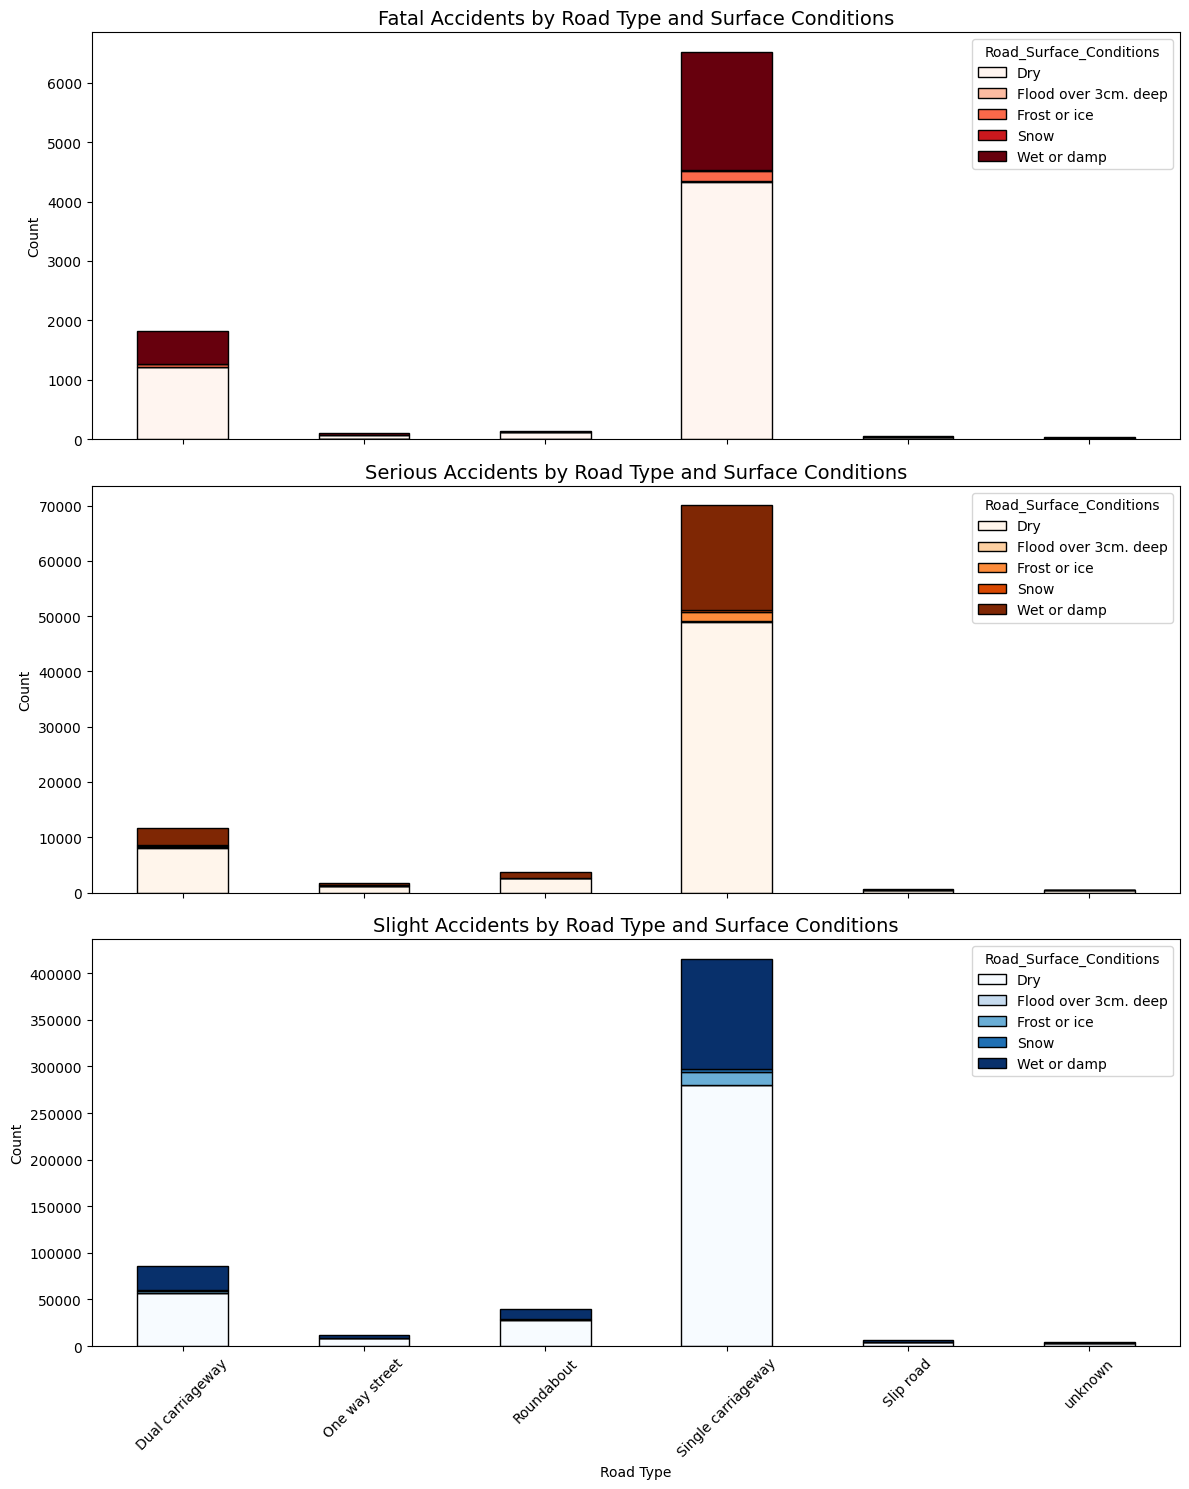

In [44]:

fatal_counts = Fatal.groupby(['Road_Type', 'Road_Surface_Conditions']).size().unstack()
serious_counts = Serious.groupby(['Road_Type', 'Road_Surface_Conditions']).size().unstack()
slight_counts = Slight.groupby(['Road_Type', 'Road_Surface_Conditions']).size().unstack()

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

fatal_counts.plot(kind='bar', stacked=True, ax=axes[0], colormap='Reds', edgecolor='black')
axes[0].set_title('Fatal Accidents by Road Type and Surface Conditions', fontsize=14)
axes[0].set_ylabel('Count')

serious_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='Oranges', edgecolor='black')
axes[1].set_title('Serious Accidents by Road Type and Surface Conditions', fontsize=14)
axes[1].set_ylabel('Count')

slight_counts.plot(kind='bar', stacked=True, ax=axes[2], colormap='Blues', edgecolor='black')
axes[2].set_title('Slight Accidents by Road Type and Surface Conditions', fontsize=14)
axes[2].set_ylabel('Count')
axes[2].set_xlabel('Road Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Insight 7: Hhhmmmm this is interesting, I think the City or the Country need to do something about those results, since it shown that Single and Dual carriageway cause too much accident when they are Dry or 'Wet or damp'. either Fatal or Serious or Slight Accident, they mostly cause the accidents</h3>

<h1></h1>

<h1>8. And in urban and Rural which Road Types as well as their Conditions Cause more Accident?</h1>

In [45]:
urban.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(10)

Road_Type           Road_Surface_Conditions
Single carriageway  Dry                        234694
                    Wet or damp                 81073
Dual carriageway    Dry                         35062
Roundabout          Dry                         19808
Dual carriageway    Wet or damp                 14394
One way street      Dry                          9270
Roundabout          Wet or damp                  8022
Single carriageway  Frost or ice                 5956
One way street      Wet or damp                  2869
unknown             Dry                          2646
dtype: int64

In [46]:
rural.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(10)

Road_Type           Road_Surface_Conditions
Single carriageway  Dry                        98526
                    Wet or damp                57666
Dual carriageway    Dry                        31210
                    Wet or damp                15139
Roundabout          Dry                        10976
Single carriageway  Frost or ice                8962
Roundabout          Wet or damp                 4186
Slip road           Dry                         2803
Single carriageway  Snow                        2325
Dual carriageway    Frost or ice                1498
dtype: int64

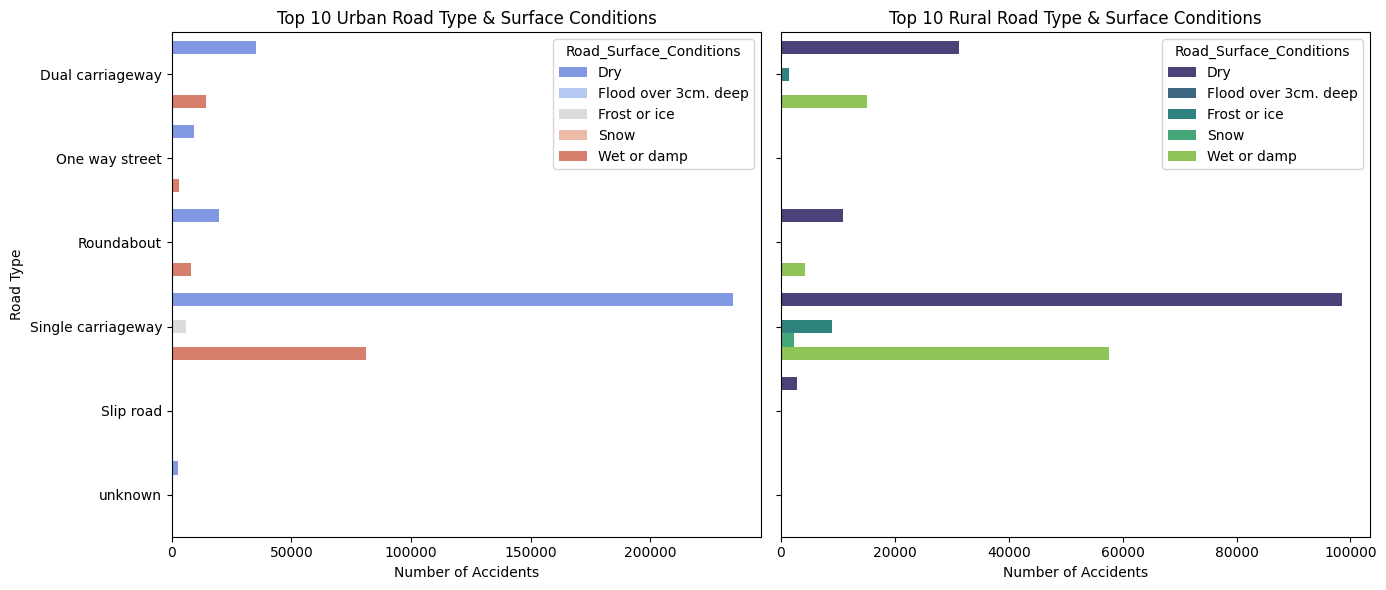

In [47]:
urban_top = urban.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(10)
rural_top = rural.groupby(['Road_Type', 'Road_Surface_Conditions']).size().nlargest(10)

urban_table = urban_top.reset_index(name='Count')
rural_table = rural_top.reset_index(name='Count')

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sbs.barplot(data=urban_table, x='Count', y='Road_Type', hue='Road_Surface_Conditions', ax=axes[0], palette='coolwarm')
axes[0].set_title('Top 10 Urban Road Type & Surface Conditions')
axes[0].set_xlabel('Number of Accidents')
axes[0].set_ylabel('Road Type')

sbs.barplot(data=rural_table, x='Count', y='Road_Type', hue='Road_Surface_Conditions', ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Rural Road Type & Surface Conditions')
axes[1].set_xlabel('Number of Accidents')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<h3>Insight 8: Well that's to be expected, Single and Dual carriageway when they are either Dry or 'Wet or damp' Causes more accident through out the whole record.</h3>

<h1></h1>

<h1>9. Since we have those record where we saw that Single and Dual carriageway cause more accident than the rest of the other road, let see which type of Vehicle is more likely to have an accident on those road </h1>

In [48]:
single = accident[accident['Road_Type']=='Single carriageway']
dual = accident[accident['Road_Type']=='Dual carriageway']

In [49]:
single['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     371028
Van / Goods 3.5 tonnes mgw or under      25460
Bus or coach (17 or more pass seats)     19090
Motorcycle over 500cc                    19050
Goods 7.5 tonnes mgw and over            12915
Name: count, dtype: int64

In [50]:
dual['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     74820
Van / Goods 3.5 tonnes mgw or under      5107
Bus or coach (17 or more pass seats)     4043
Motorcycle over 500cc                    3930
Goods 7.5 tonnes mgw and over            2631
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

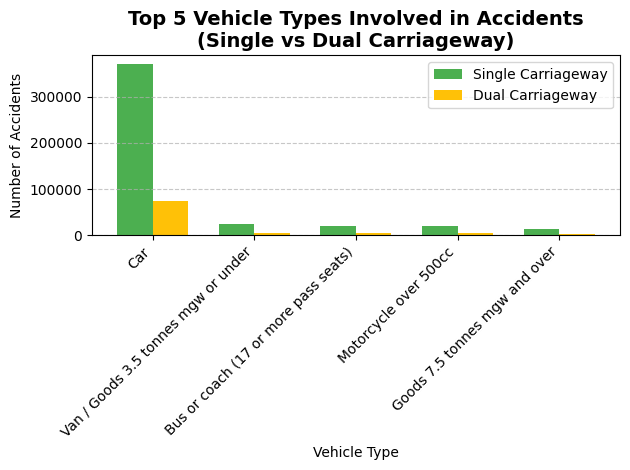

In [51]:
single_counts = single['Vehicle_Type'].value_counts().nlargest(5)
dual_counts = dual['Vehicle_Type'].value_counts().nlargest(5)

data = pd.DataFrame({
    'Single Carriageway': single_counts,
    'Dual Carriageway': dual_counts
}).fillna(0)

plt.figure(figsize=(10, 6))
data.plot(kind='bar', width=0.7, color=['#4CAF50', '#FFC107'])

plt.title('Top 5 Vehicle Types Involved in Accidents\n(Single vs Dual Carriageway)', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<h3>insight 9: Car really have some issue, it is shown that on single and dual carriageway car followed by van and bus is more likely to cause an accident.</h3>

<h1></h1>

<h1>10. Let's stop on Car and start looking at District Area</h1>
<h2>Which Disctrict is more likely to have an accident in urban and rural</h2>

In [52]:
urban = accident[accident['Urban_or_Rural_Area'] == 'Urban']
urban_count = urban['District Area'].value_counts()
urban_total = urban_count.sum()
urban_percent = (urban_count / urban_total) * 100

urban_df = pd.DataFrame({'District Area': urban_count.index, 'Accident Count': urban_count.values, 'Percentage': urban_percent.values})
urban_df = urban_df.head(10).reset_index(drop=True)

rural = accident[accident['Urban_or_Rural_Area'] == 'Rural']
rural_count = rural['District Area'].value_counts()
rural_total = rural_count.sum()
rural_percent = (rural_count / rural_total) * 100

rural_df = pd.DataFrame({'District Area': rural_count.index, 'Accident Count': rural_count.values, 'Percentage': rural_percent.values})
rural_df = rural_df.head(10).reset_index(drop=True)

print("Top 10 Urban Districts with the Most Accidents:")
display(urban_df)

print("\nTop 10 Rural Districts with the Most Accidents:")
display(rural_df)

Top 10 Urban Districts with the Most Accidents:


,District Area,Accident Count,Percentage
0,Birmingham,13357,3.167583
1,Leeds,7124,1.689441
2,Manchester,6577,1.559721
3,Westminster,5706,1.353165
4,Liverpool,5539,1.313562
5,Bradford,5416,1.284392
6,Sheffield,5248,1.244552
7,Glasgow City,4806,1.139732
8,"Bristol, City of",4581,1.086374
9,Lambeth,4241,1.005744



Top 10 Rural Districts with the Most Accidents:


,District Area,Accident Count,Percentage
0,East Riding of Yorkshire,2364,0.989163
1,Cornwall,1992,0.833508
2,Highland,1811,0.757772
3,South Cambridgeshire,1803,0.754425
4,Aberdeenshire,1781,0.745219
5,Leeds,1774,0.742290
6,Powys,1692,0.707979
7,Huntingdonshire,1673,0.700029
8,East Lindsey,1538,0.643542
9,Carmarthenshire,1527,0.638939


In [53]:
count.sum()

np.int64(660679)

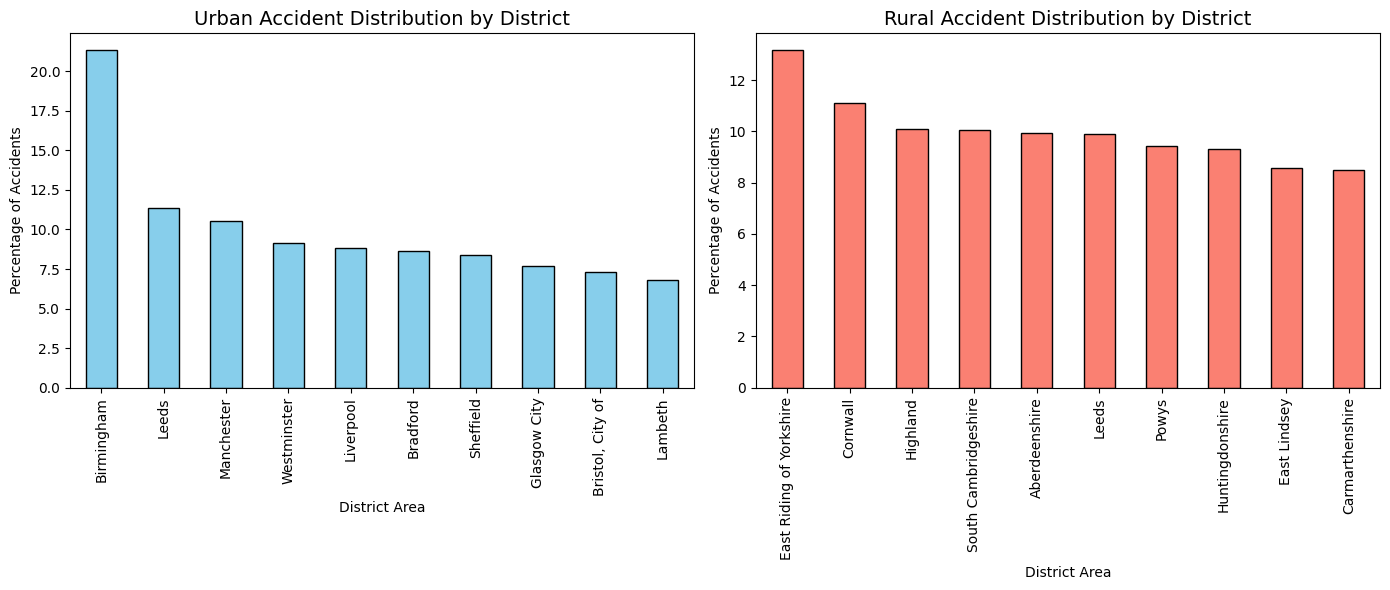

In [54]:
urban = accident[accident['Urban_or_Rural_Area'] == 'Urban']
urban_count = urban['District Area'].value_counts().nlargest(10)  
urban_total = urban_count.sum()
urban_percent = (urban_count / urban_total) * 100  

rural = accident[accident['Urban_or_Rural_Area'] == 'Rural']
rural_count = rural['District Area'].value_counts().nlargest(10)
rural_total = rural_count.sum()
rural_percent = (rural_count / rural_total) * 100 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

urban_percent.sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Urban Accident Distribution by District', fontsize=14)
axes[0].set_xlabel('District Area')
axes[0].set_ylabel('Percentage of Accidents')
axes[0].tick_params(axis='x', rotation=90)

rural_percent.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Rural Accident Distribution by District', fontsize=14)
axes[1].set_xlabel('District Area')
axes[1].set_ylabel('Percentage of Accidents')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


<h3>Insight 10: As we can see the data shows that Birmingham was most likely to have an accident in urban area as 3% of the accident being record in urban area was in Birmingham</h3>
<h3> on the other hand in rural area, East Riding of Yorkshire was most likely to have an accident with 1% of the accident in the rural area happened on East Riding of Yorkshire</h3>

<h1></h1>

<h1>11. now, Which Disctrict area have the record with the most casualties involved? and Which is the District have the least number of casualties involved</h1>

In [55]:
total_casualties = accident['Number_of_Casualties'].sum()
print("Total Number of Casualties:", total_casualties)

Total Number of Casualties: 896568


In [56]:
num = accident.groupby('District Area')['Number_of_Casualties'].sum()
total = num.sum()
percent = (num / total) * 100
percent.nlargest(5)

District Area
Birmingham    2.082831
Leeds         1.387290
Manchester    1.052569
Bradford      1.033720
Liverpool     0.966909
Name: Number_of_Casualties, dtype: float64

In [57]:
num.nlargest(5)

District Area
Birmingham    18674
Leeds         12438
Manchester     9437
Bradford       9268
Liverpool      8669
Name: Number_of_Casualties, dtype: int64

In [58]:
accident.groupby('District Area')['Number_of_Casualties'].sum().nsmallest(10)

District Area
Clackmannanshire             115
Orkney Islands               154
Shetland Islands             202
Clackmannshire               204
London Airport (Heathrow)    217
Berwick-upon-Tweed           222
Teesdale                     222
Western Isles                249
South Shropshire             324
Alnwick                      351
Name: Number_of_Casualties, dtype: int64

In [59]:
num = accident.groupby('District Area')['Number_of_Casualties'].sum()

# Get top 5 and bottom 10 districts
top_5 = num.nlargest(5)
bottom_5 = num.nsmallest(5)

# Convert to DataFrame for better display
top_5_df = top_5.reset_index().rename(columns={'Number_of_Casualties': 'Total Casualties'})
bottom_5_df = bottom_5.reset_index().rename(columns={'Number_of_Casualties': 'Total Casualties'})

# Display tables
print("Top 5 Districts with the Most Casualties:")
display(top_5_df)

print("\nBottom 10 Districts with the Least Casualties:")
display(bottom_5_df)

Top 5 Districts with the Most Casualties:


,District Area,Total Casualties
0,Birmingham,18674
1,Leeds,12438
2,Manchester,9437
3,Bradford,9268
4,Liverpool,8669



Bottom 10 Districts with the Least Casualties:


,District Area,Total Casualties
0,Clackmannanshire,115
1,Orkney Islands,154
2,Shetland Islands,202
3,Clackmannshire,204
4,London Airport (Heathrow),217


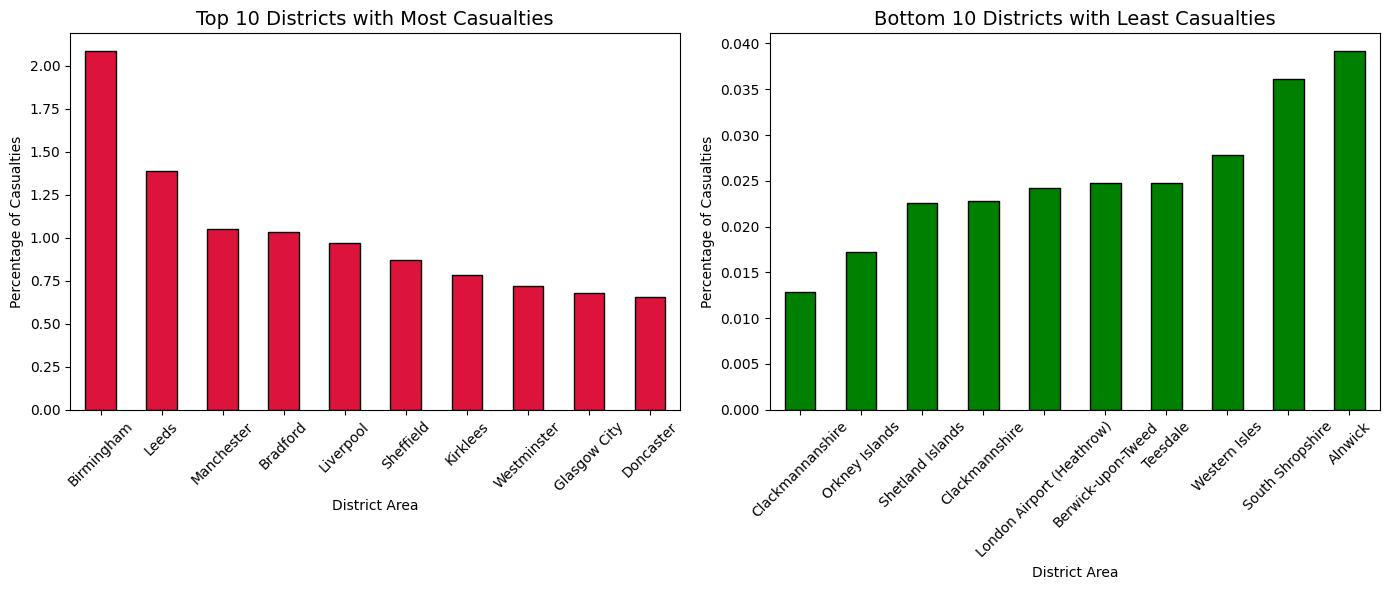

In [60]:
num = accident.groupby('District Area')['Number_of_Casualties'].sum()

total = num.sum()
percent = (num / total) * 100

top_10 = percent.nlargest(10)
bottom_10 = percent.nsmallest(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_10.plot(kind='bar', ax=axes[0], color='crimson', edgecolor='black')
axes[0].set_title('Top 10 Districts with Most Casualties', fontsize=14)
axes[0].set_xlabel('District Area')
axes[0].set_ylabel('Percentage of Casualties')
axes[0].tick_params(axis='x', rotation=45)

bottom_10.plot(kind='bar', ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Bottom 10 Districts with Least Casualties', fontsize=14)
axes[1].set_xlabel('District Area')
axes[1].set_ylabel('Percentage of Casualties')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<h3>Insight 11: The data indicates that out of 89.7K total recorded casualties, 2% occurred in Birmingham, totaling 18,674 casualties in that district.</h3>
<h3>Meanwhile, Clackmannanshire recorded the fewest casualties, with only 115 throughout the entire dataset.</h3>

<h1></h1>

<h1>12. Which district have the most vehicle accident involve and what type of vehicle always cause an accident in that destrict (beside car)</h1>

In [61]:
veh_per_dist = accident.groupby('District Area')['Number_of_Vehicles'].sum()
top_dist = veh_per_dist.idxmax()
top_veh_count = veh_per_dist.max()

print(f"District with the most vehicles involved in accidents: {top_dist} ({top_veh_count} vehicles)")

dist_data = accident[accident['District Area'] == top_dist]

car = dist_data['Vehicle_Type'].value_counts().idxmax()
car_count = dist_data['Vehicle_Type'].value_counts().max()
car_pct = (car_count / dist_data.shape[0]) * 100

non_car = dist_data[dist_data['Vehicle_Type'] != 'Car']
non_car_type = non_car['Vehicle_Type'].value_counts().idxmax()
non_car_count = non_car['Vehicle_Type'].value_counts().max()
non_car_pct = (non_car_count / dist_data.shape[0]) * 100


print(f"The Car, known to be the most problematic vehicle, has a record in {top_dist}: {car} ({car_count} times, {car_pct:.2f}%)")
print(f"Most common vehicle type involved (besides cars) in {top_dist}: {non_car_type} ({non_car_count} times, {non_car_pct:.2f}%)")


District with the most vehicles involved in accidents: Birmingham (24869 vehicles)
The Car, known to be the most problematic vehicle, has a record in Birmingham: Car (9600 times, 71.16%)
Most common vehicle type involved (besides cars) in Birmingham: Van / Goods 3.5 tonnes mgw or under (785 times, 5.82%)


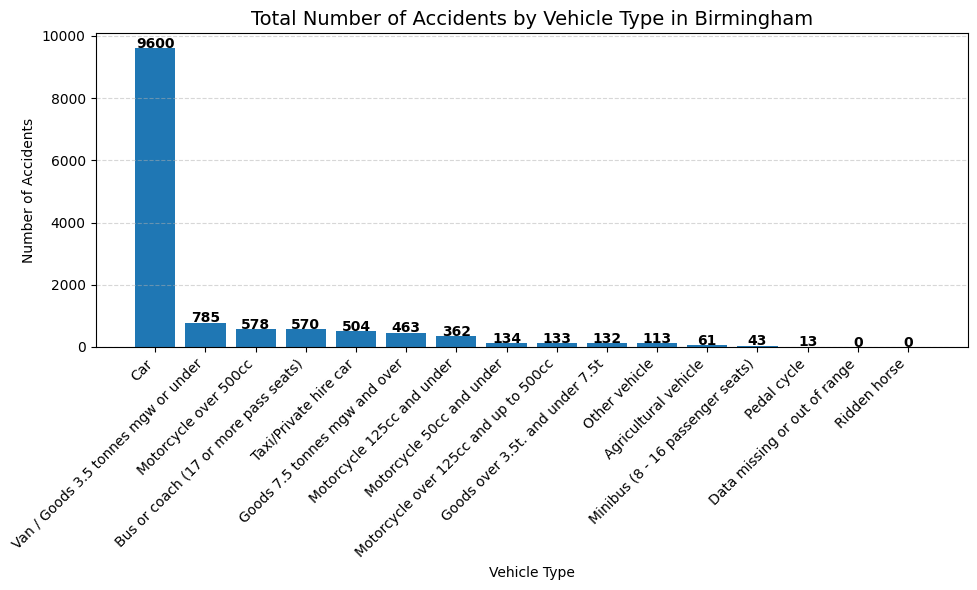

In [62]:
birmingham_data = accident[accident['District Area'] == 'Birmingham']
vehicle_counts = birmingham_data['Vehicle_Type'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(vehicle_counts.index, vehicle_counts.values)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 5, 
             f"{bar.get_height()}", 
             ha='center', fontsize=10, fontweight='bold')

plt.title('Total Number of Accidents by Vehicle Type in Birmingham', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h3>Insight 12: The data reveals that Birmingham has the highest number of car accidents, with cars accounting for 71% of all recorded incidents. Additionally, Vans/Goods vehicles (3.5 tonnes mgw or under) rank second but contribute to only 6% of the total accidents.</h3>

<h3></h3>

<h1></h1>

<h2>I think We had enough of cars record, let's talk about time and dates</h2>
<h1>13. How about looking at which year had the most accident happened through out the whole record, is there an improvement each year or the accident is just getting worse?</h1>

In [63]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Year'].value_counts()

Year
2019.0    71867
2020.0    70163
2021.0    66172
2022.0    56805
Name: count, dtype: int64

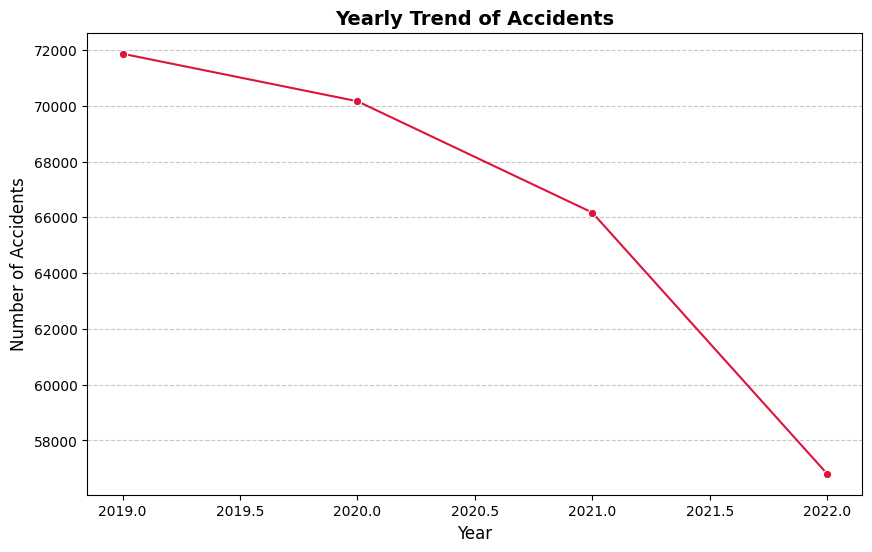

In [64]:
yearly_accidents = accident['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sbs.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o', color='crimson')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Yearly Trend of Accidents', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>Insight 13: The data shows a consistent decline in the number of accidents each year, indicating an overall improvement in road safety over time.</h3>

<h1></h1>

<h1>14. How about Per month, which month is have more accident happened or more likely to have an accident?</h1>

In [65]:
accident['Month'] = accident['Accident Date'].dt.month
accident['Month'].value_counts()

Month
11.0    24240
12.0    24156
10.0    23962
7.0     22939
9.0     22558
2.0     22264
6.0     22196
3.0     21824
5.0     21723
8.0     21106
4.0     19787
1.0     18252
Name: count, dtype: int64

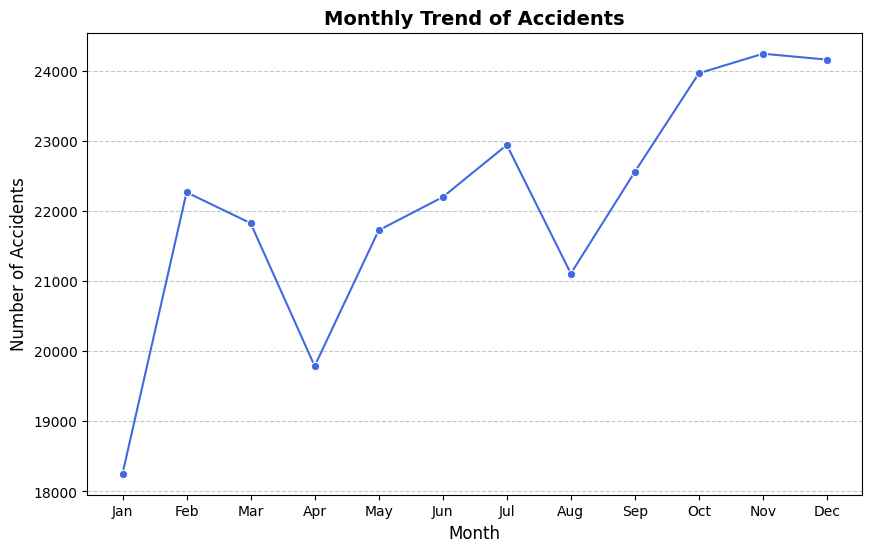

In [66]:
monthly_accidents = accident['Month'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
sbs.lineplot(x=months, y=monthly_accidents.values, marker='o', color='royalblue')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.title('Monthly Trend of Accidents', fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h3>Insight 14: The data shows that November and December have the highest number of accidents, while January and April have the lowest, indicating seasonal variations in accident trends.</h3>

<h1></h1>

<h1>15. How about which district have more accident each year?</h1>

In [67]:
accident['Year'] = accident['Accident Date'].dt.year  
top_districts_per_year = {}
years = [2019, 2020, 2021, 2022]

for year in years:
    top_districts_per_year[year] = (
        accident[accident['Year'] == year]
        .groupby('District Area')
        .size()
        .nlargest(10)
    )

for year, data in top_districts_per_year.items():
    print(f"\nTop 10 Districts with Most Accidents in {year}:\n")
    print(data)
    print("-" * 50)



Top 10 Districts with Most Accidents in 2019:

District Area
Birmingham            1554
Leeds                  950
Glasgow City           721
Manchester             684
Liverpool              628
Sheffield              616
Bradford               614
Westminster            608
Bristol, City of       557
Edinburgh, City of     524
dtype: int64
--------------------------------------------------

Top 10 Districts with Most Accidents in 2020:

District Area
Birmingham            1438
Leeds                  921
Manchester             721
Glasgow City           676
Sheffield              600
Liverpool              597
Bradford               587
Westminster            579
Edinburgh, City of     547
Kirklees               524
dtype: int64
--------------------------------------------------

Top 10 Districts with Most Accidents in 2021:

District Area
Birmingham            1308
Leeds                  914
Manchester             690
Bradford               641
Sheffield              614
Glasgow Cit

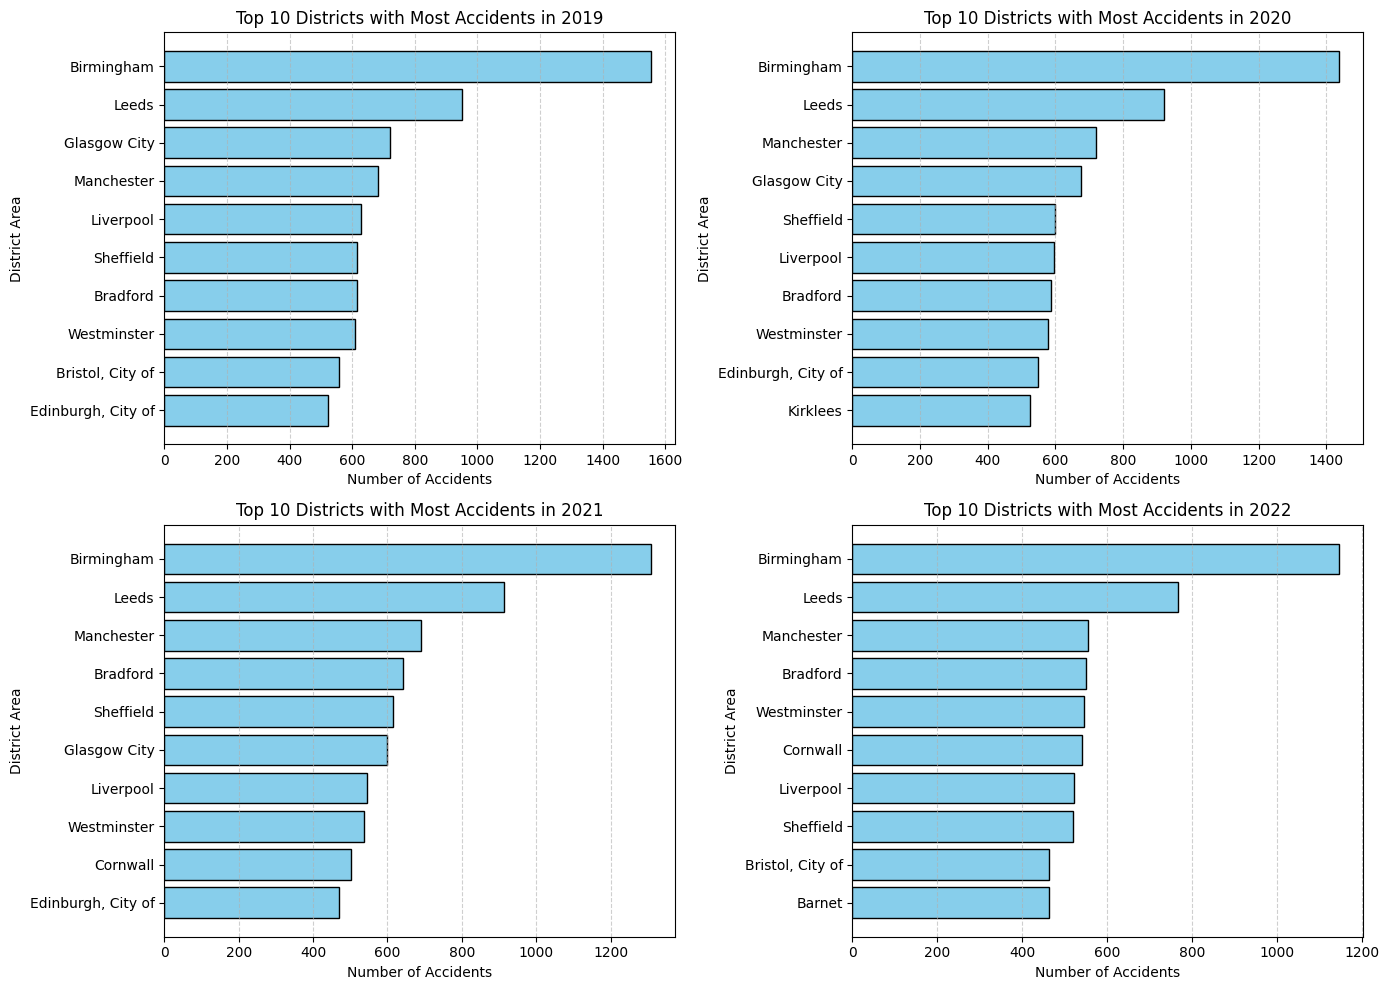

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

years = [2019, 2020, 2021, 2022]
ax_idx = 0

for i in range(2):
    for j in range(2):
        year = years[ax_idx]
        data = top_districts_per_year[year]
        
        axes[i, j].barh(data.index[::-1], data.values[::-1], color='skyblue', edgecolor='black')
        axes[i, j].set_title(f"Top 10 Districts with Most Accidents in {year}", fontsize=12)
        axes[i, j].set_xlabel("Number of Accidents")
        axes[i, j].set_ylabel("District Area")
        axes[i, j].grid(axis='x', linestyle='--', alpha=0.6)
        
        ax_idx += 1

plt.tight_layout()
plt.show()

<h3>Insight 15: From 2019 to 2022, Birmingham consistently recorded the highest number of accidents each year, making it the most accident-prone district. Leeds and Manchester also appeared among the top 3 districts with the most accidents in all four years, highlighting persistent accident hotspots in these urban areas.</h3>

<h1></h1>

<h1>16. How do seasonal changes affect the number of road accidents throughout the year? </h1>

In [69]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

accident['Season'] = accident['Accident Date'].dt.month.apply(get_season)

In [70]:
accident['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

Season
Winter     64672
Spring     63334
Summer     66241
Fall      466432
Name: count, dtype: int64

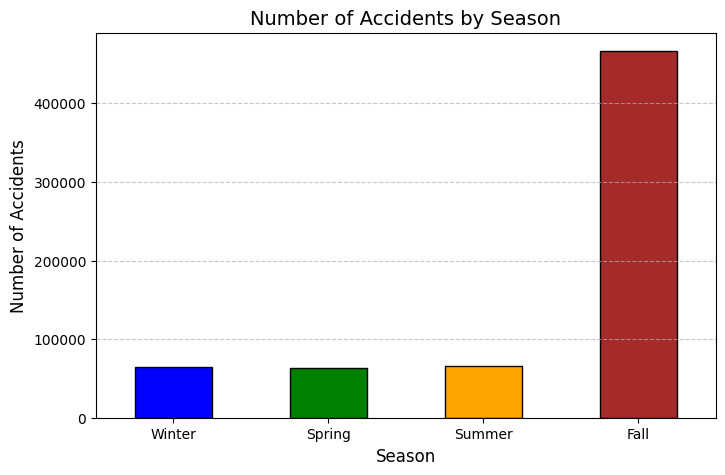

In [71]:
season_counts = accident['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'brown'], edgecolor='black')
plt.title("Number of Accidents by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<h3>Insight 16: The data reveals a significant seasonal pattern in accidents, with fall recording the highest number of incidents. This may be due to factors like reduced daylight, wet road conditions, and increased traffic activity. Meanwhile, winter, spring, and summer show relatively lower accident counts.</h3>

<h1></h1>

<h1>17. Do poor lighting conditions or hazardous road surfaces contribute to the high number of accidents in the fall season?</h1>

In [72]:
accident.groupby(['Season', 'Light_Conditions']).size().unstack()

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Season,,,,,
Fall,4650,93412,1815,26740,339815
Spring,431,9184,200,2671,50848
Summer,357,5907,163,1780,58034
Winter,1046,20832,365,6246,36183


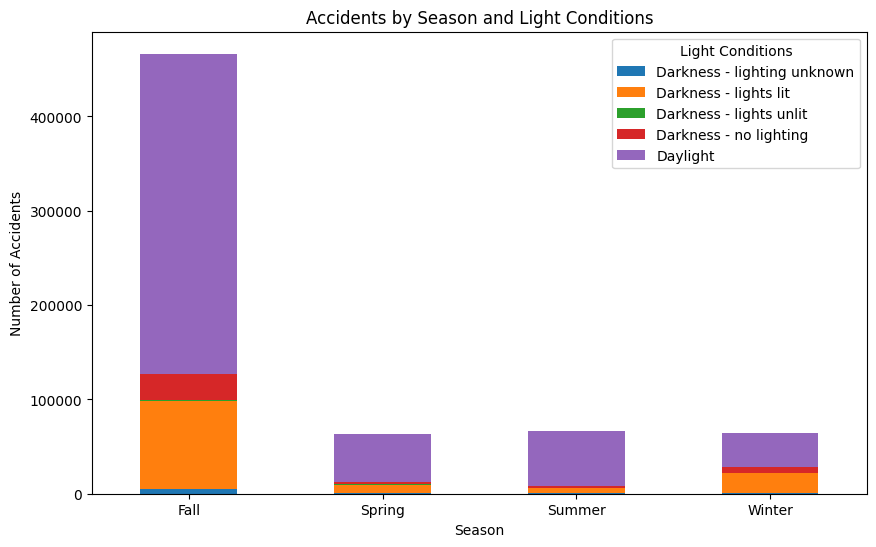

In [73]:
season_light = accident.groupby(['Season', 'Light_Conditions']).size().unstack()
season_light.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accidents by Season and Light Conditions")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Light Conditions")
plt.show()


In [74]:
accident.groupby(['Season', 'Road_Surface_Conditions']).size().unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Season,,,,,
Fall,318106,753,9466,3003,135104
Spring,51722,47,576,199,10790
Summer,53218,106,6,11,12900
Winter,25501,111,8469,2677,27914


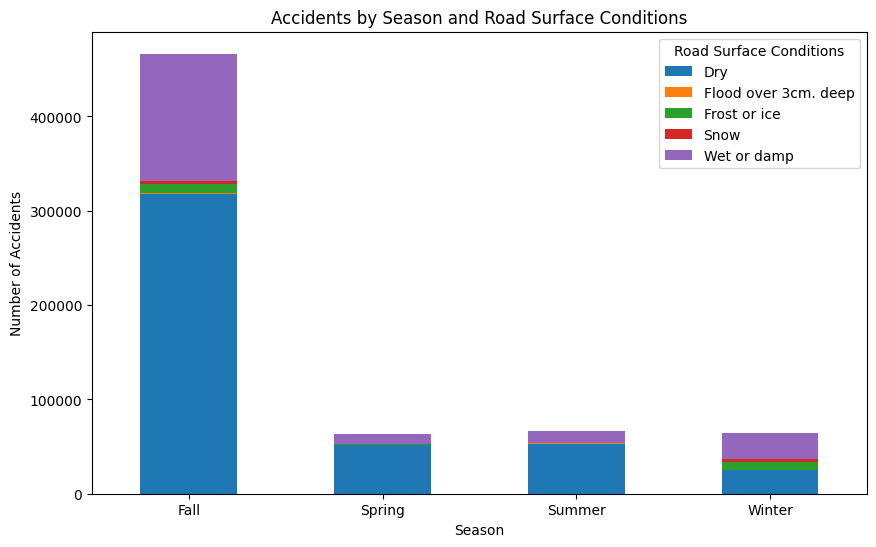

In [75]:
season_road = accident.groupby(['Season', 'Road_Surface_Conditions']).size().unstack()
season_road.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accidents by Season and Road Surface Conditions")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Road Surface Conditions")
plt.show()


In [76]:
accident.groupby(['Season', 'Weather_Conditions']).size().unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unaccounted
Season,,,,,,,,,
Fall,5882,367079,2618,11113,6949,59207,469,3176,9939
Spring,1013,54346,93,870,736,4657,47,263,1309
Summer,235,55609,70,748,303,7926,1,21,1328
Winter,1424,43851,747,4419,1627,7906,368,2778,1552


<Figure size 1000x600 with 0 Axes>

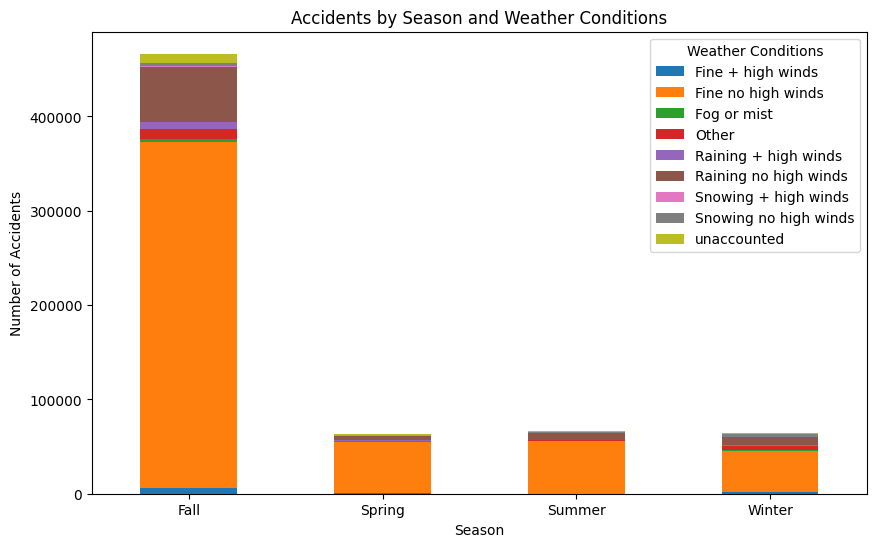

In [77]:
plt.figure(figsize=(10, 6))
season_weather = accident.groupby(['Season', 'Weather_Conditions']).size().unstack()
season_weather.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accidents by Season and Weather Conditions")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.legend(title="Weather Conditions")
plt.xticks(rotation=0)
plt.show()

<h3>Insight 17: Fall records the highest number of accidents, primarily due to wet road conditions and heavy rainfall rather than poor lighting. While darkness contributes, the data shows that most accidents occur on wet or damp roads, often during rainy weather. This suggests that slippery surfaces and reduced visibility from precipitation are key risk factors in the fall season.</h3>

<h1></h1>

<h1>18. Relationship Between Number of Vehicles and Accident Severity</h1>

In [78]:
accident.groupby(['Season', 'Accident_Severity'])['Number_of_Vehicles'].describe()

count      mean       std  min  25%  50%  75%  \
Season Accident_Severity                                                     
Fall   Fatal                6067.0  1.793803  1.044592  1.0  1.0  2.0  2.0   
       Serious             62418.0  1.681262  0.752348  1.0  1.0  2.0  2.0   
       Slight             397947.0  1.857064  0.700476  1.0  1.0  2.0  2.0   
Spring Fatal                 893.0  1.793953  0.964672  1.0  1.0  2.0  2.0   
       Serious              8660.0  1.668245  0.744683  1.0  1.0  2.0  2.0   
       Slight              53781.0  1.858407  0.700220  1.0  1.0  2.0  2.0   
Summer Fatal                 867.0  1.835063  1.023632  1.0  1.0  2.0  2.0   
       Serious              9177.0  1.705023  0.721184  1.0  1.0  2.0  2.0   
       Slight              56197.0  1.870367  0.677241  1.0  1.0  2.0  2.0   
Winter Fatal                 834.0  1.679856  0.909812  1.0  1.0  1.0  2.0   
       Serious              7962.0  1.635519  0.783760  1.0  1.0  2.0  2.0   
       Slight              55876.0  1.830285  0.723669  1.0  1.0  2.0  2.0   

                           max  
Season Accident_Severity        
Fall   Fatal              28.0  
       Serious            19.0  
       Slight             32.0  
Spring Fatal               8.0  
       Serious             8.0  
       Slight             14.0  
Summer Fatal              14.0  
       Serious             8.0  
       Slight             10.0  
Winter Fatal               7.0  
       Serious            12.0  
       Slight             14.0

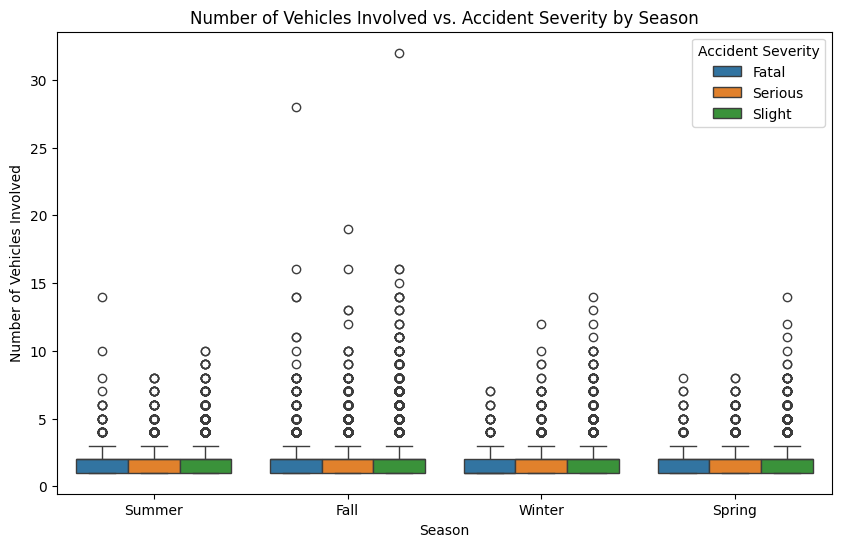

In [79]:
plt.figure(figsize=(10, 6))
sbs.boxplot(x='Season', y='Number_of_Vehicles', hue='Accident_Severity', data=accident)
plt.title("Number of Vehicles Involved vs. Accident Severity by Season")
plt.xlabel("Season")
plt.ylabel("Number of Vehicles Involved")
plt.legend(title="Accident Severity")
plt.show()

<h3>Insight 18: The visualization shows that accidents involving a higher number of vehicles tend to be more severe, with more fatal and serious injuries observed. However, most accidents involve fewer vehicles, indicating that single-vehicle or small-vehicle collisions are more common. The distribution appears similar across all seasons, suggesting that seasonality does not significantly impact accident severity based on the number of vehicles involved.</h3>

<h1></h1>

<h1>19. Urban vs. Rural Accidents in Fall</h1>

In [80]:
accident[accident['Season'] == 'Fall']['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          298502
Rural          167923
Unallocated         7
Name: count, dtype: int64

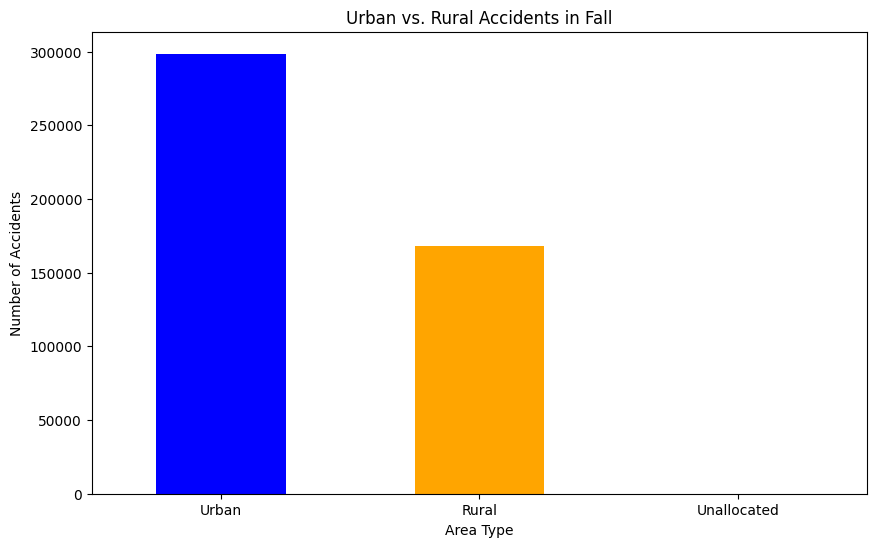

In [81]:
plt.figure(figsize=(10, 6))
fall_urban_rural = accident[accident['Season'] == 'Fall']['Urban_or_Rural_Area'].value_counts()
fall_urban_rural.plot(kind='bar', color=['blue', 'orange'])
plt.title("Urban vs. Rural Accidents in Fall")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

<h3>Insight 19: The data indicates that urban areas experience significantly more accidents in the fall compared to rural regions. This could be due to higher traffic density, increased commuting, and more complex road networks in urban environments. However, rural accidents, while fewer, might be more severe due to higher-speed roads and limited emergency response access.</h3>

<h1></h1>

<h1>20. Accident Trends by Road Type</h1>

In [95]:
accident.groupby(['Road_Type', 'Season']).size().unstack()


Season,Fall,Spring,Summer,Winter
Road_Type,,,,
Dual carriageway,70258,9253,9626,10287
One way street,9582,1311,1380,1286
Roundabout,31279,4169,4502,4042
Single carriageway,347209,47482,49526,47926
Slip road,4944,693,685,719
unknown,3160,426,522,412


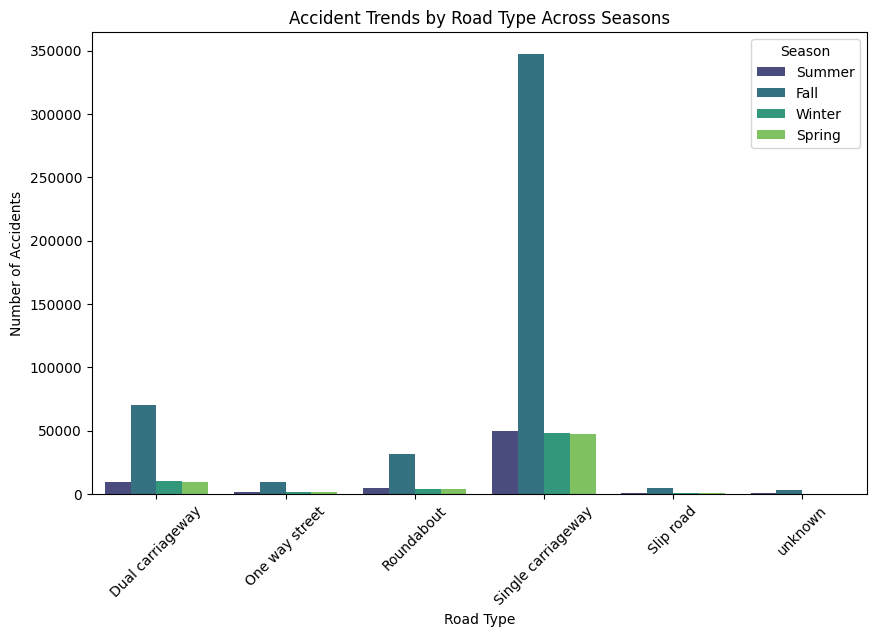

In [82]:
plt.figure(figsize=(10, 6))
sbs.countplot(x='Road_Type', hue='Season', data=accident, palette='viridis')
plt.title("Accident Trends by Road Type Across Seasons")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()

<h3>Insight 20: Single carriageways account for the highest number of accidents across all seasons, with fall showing a significant spike. This suggests that these roads may pose higher risks due to factors like traffic congestion, road conditions, or driver behavior. Other road types, such as roundabouts and dual carriageways, show relatively lower accident counts.</h3>

<h1></h1>

<h1></h1>

<h1></h1>

<h1></h1>

<h1></h1>

<h1></h1>

<h1></h1>

<h1></h1>

In [83]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions                 object
Vehicle_Type                     category
Year                              float64
Month                             float64
Season                             object
dtype: object

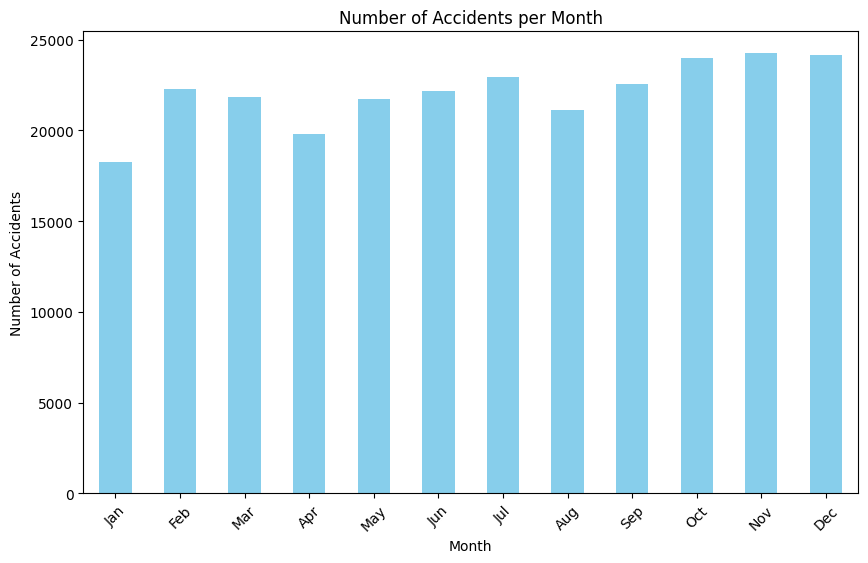

In [84]:
accident['Month'] = accident['Accident Date'].dt.month
accidents_per_month = accident.groupby('Month').size()
plt.figure(figsize=(10, 6))
accidents_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.show()

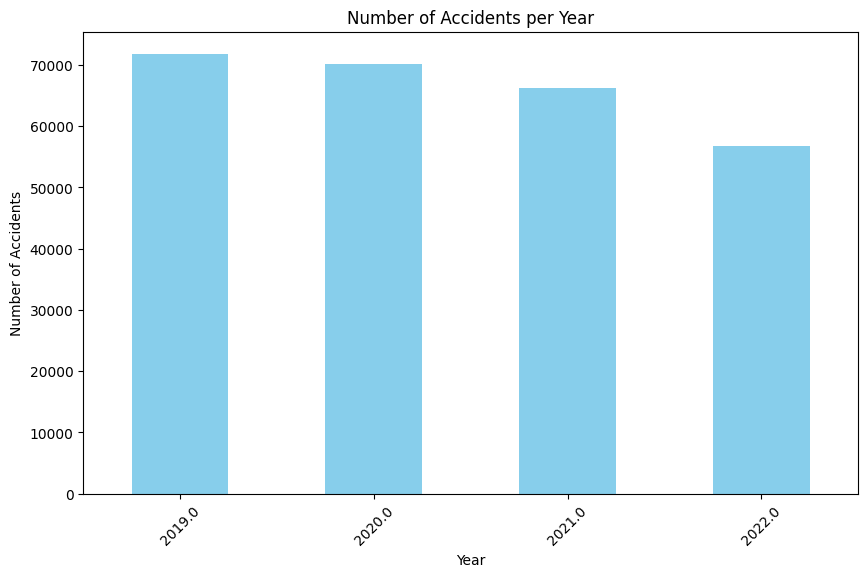

In [85]:
accident['Year'] = accident['Accident Date'].dt.year
accidents_per_year = accident.groupby('Year').size()

# Plot the results
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

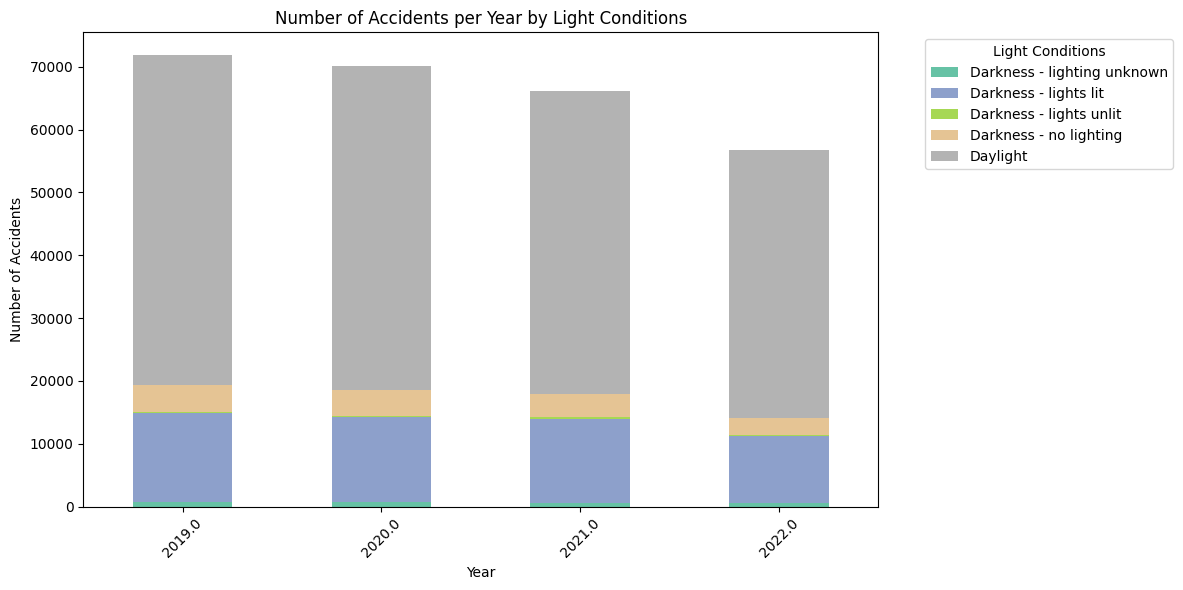

In [86]:
accident['Year'] = accident['Accident Date'].dt.year
accidents_per_year_light = accident.groupby(['Year', 'Light_Conditions']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
accidents_per_year_light.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12, 6))

plt.title('Number of Accidents per Year by Light Conditions')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)

plt.legend(title='Light Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()


In [87]:
roadaccident = accident.groupby([ 'Road_Type', 'Road_Surface_Conditions','Accident_Severity']).size()
# accident_agg = np.round(accident.groupby([ 'Road_Type', 'Road_Surface_Conditions','Accident_Severity'])['Number_of_Casualties'].mean(), 1)

In [88]:
roadaccident.unstack()

Accident_Severity                           Fatal  Serious  Slight
Road_Type          Road_Surface_Conditions                        
Dual carriageway   Dry                       1217     8104   56951
                   Flood over 3cm. deep         5       42     255
                   Frost or ice                36      259    2113
                   Snow                         6      108     795
                   Wet or damp                551     3233   25749
One way street     Dry                         74     1247    8779
                   Flood over 3cm. deep         0        3       2
                   Frost or ice                 0       15     168
                   Snow                         2        7      67
                   Wet or damp                 19      383    2793
Roundabout         Dry                        110     2640   28034
                   Flood over 3cm. deep         0        2      20
                   Frost or ice                 3       60     682
                   Snow                         2       12     218
                   Wet or damp                 27      951   11231
Single carriageway Dry                       4338    48926  279961
                   Flood over 3cm. deep        18      103     551
                   Frost or ice               153     1651   13114
                   Snow                        25      427    4133
                   Wet or damp               1993    18952  117798
Slip road          Dry                         30      419    4271
                   Flood over 3cm. deep         0        1       8
                   Frost or ice                 1       15     162
                   Snow                         0        9      51
                   Wet or damp                 18      167    1889
unknown            Dry                         21      372    3053
                   Flood over 3cm. deep         0        1       6
                   Frost or ice                 0        7      78
                   Snow                         0        2      26
                   Wet or damp                 12       99     843

<h2>Insight 1: based on the data shown, Dry Single Carriageway cause more accident, followed by Wet or damp road.</h2>
<h2>while One way street with Flood over 3cm. deep cause only total of 5 accident, when dried, it most likely to cause an accident, But Slip road on the other hand causes less accident total and much safer to drive on</h2>

<h1></h1>

<h1>Earlier I shows which road is more likely to cause acccident, how about the which road is more dangerous that cause more casualty?</h1>

In [89]:
accident.groupby('Road_Type')['Number_of_Casualties'].mean()

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.344666
Slip road             1.423661
unknown               1.248230
Name: Number_of_Casualties, dtype: float64

In [90]:
accident.groupby('Road_Type')['Number_of_Casualties'].mean().idxmax()

'Dual carriageway'

<h2>Insight 5: The Data Shows that Dual Carriageway Road is more likely to have casualty than the others, meaning that people either avoid the road or the City do something about the road like changing it?</h2>

<h1></h1>

<h1>Since the data shows that Dual Carriageway Road is the most dangerous Road, how about the most dangerous Car? as well as Road Conditions </h1>

<h2>What kind of vehicle are mostlikely to </h2>

In [91]:
accident.groupby('Vehicle_Type')['Number_of_Casualties'].mean()

Vehicle_Type
Agricultural vehicle                     1.342065
Bus or coach (17 or more pass seats)     1.349216
Car                                      1.358841
Data missing or out of range             1.500000
Goods 7.5 tonnes mgw and over            1.351881
Goods over 3.5t. and under 7.5t          1.362861
Minibus (8 - 16 passenger seats)         1.345648
Motorcycle 125cc and under               1.332635
Motorcycle 50cc and under                1.337235
Motorcycle over 125cc and up to 500cc    1.343521
Motorcycle over 500cc                    1.359434
Other vehicle                            1.340075
Pedal cycle                              1.370558
Ridden horse                             1.250000
Taxi/Private hire car                    1.368663
Van / Goods 3.5 tonnes mgw or under      1.354537
Name: Number_of_Casualties, dtype: float64

In [92]:
accident.groupby('Vehicle_Type')['Number_of_Casualties'].mean().nsmallest(5)

Vehicle_Type
Ridden horse                  1.250000
Motorcycle 125cc and under    1.332635
Motorcycle 50cc and under     1.337235
Other vehicle                 1.340075
Agricultural vehicle          1.342065
Name: Number_of_Casualties, dtype: float64

In [93]:
accident.groupby('Vehicle_Type')['Number_of_Casualties'].mean().nlargest(5)

Vehicle_Type
Data missing or out of range       1.500000
Pedal cycle                        1.370558
Taxi/Private hire car              1.368663
Goods over 3.5t. and under 7.5t    1.362861
Motorcycle over 500cc              1.359434
Name: Number_of_Casualties, dtype: float64

In [94]:
num.sum()

np.int64(896568)